# XGBoost
- Import Module
- read csv file

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import backtest as bt
from matplotlib import pyplot as plt

predictcsv = "XGBoost_pred2.csv"
df = pd.read_csv(predictcsv, index_col = 0, encoding='utf-8')
# print(df.columns)

### 데이터 전처리
- 빠른 연산을 위해 필요한 column만 선택
- 결측치가 많은 게임은 제외
- 게임별로 group을 나눔

In [2]:
col_list = ['rank','pred_rank','dandivi','yeondivi','group_id']
groupid = 'group_id'
data, gb_data, total_data = bt.getData(df, col_list, groupid, min_size=10)

## 단승식 정액 베팅
- 예측률 약 40%
- 배당율이 낮은 경우만 맞춰 돈을 벌지 못한다.

파일 크기: 6639
전체 게임: 644
테스트 게임: 445
베팅한 게임: 400
예측 성공한 게임: 163
최종 금액: 1760000.0


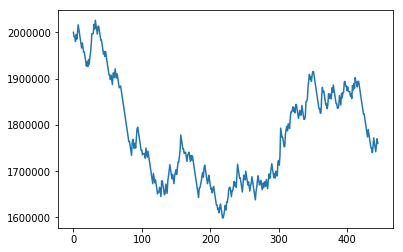

In [3]:
betting_money = 10000
start_money = 2000000
ongoing, cnt, get, moneylist = bt.dan_bet(betting_money, start_money,total_data,\
                                       'pred_rank', ascendingTF=True, min_pred=0)

print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 게임:',cnt)
print('예측 성공한 게임:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()


## 연승식 정액 베팅
- 예측률은 단승식보다 높다. (3등 안에 들기만 하기 때문)
- 마찬가지로 배당율이 낮기 때문에 돈을 벌지 못한다.

파일 크기: 6639
전체 게임: 644
테스트 게임: 445
베팅한 게임: 297
예측 성공한 게임: 214
최종 금액: 1778000.0


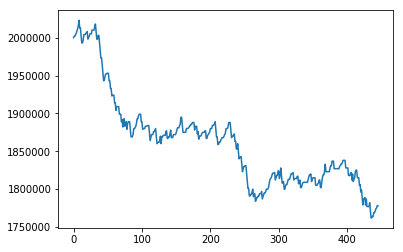

In [4]:
ongoing, cnt, get, moneylist = bt.yeon_bet(betting_money, start_money,total_data,\
                                        'pred_rank', ascendingTF=True,min_pred=0)

print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 게임:',cnt)
print('예측 성공한 게임:',get)
print('최종 금액:',moneylist[-1])
%matplotlib inline
plt.plot(moneylist)
plt.show()
